In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

In [2]:
data_path = "/om/user/shobhita/src/symmetry/"
output_path = "/om/user/shobhita/data/symmetry/figures"

In [3]:
path = "/om/user/shobhita/data/symmetry/multi_lstm_init/dataset_hamming_results/"
directory_list = os.listdir(path)

In [4]:
hamming_data = pickle.load(open(os.path.join(data_path, "AGGREGATE_RESULTS.p"), "rb"))
hamming_data

{'min': {0: (0.7681065797805786, 0.7578121423721313, 0.7671103477478027),
  1: (0.7811523675918579, 0.779009222984314, 0.7874354720115662),
  2: (0.805869996547699, 0.8030765056610107, 0.798597514629364),
  3: (0.8240864872932434, 0.8211382627487183, 0.8248575925827026),
  4: (0.8662984371185303, 0.8620930314064026, 0.8664880394935608),
  5: (0.7743264436721802, 0.7700182199478149, 0.7709788680076599),
  6: (0.795202374458313, 0.7877659797668457, 0.7844367027282715),
  7: (0.8063626289367676, 0.8050929307937622, 0.8128392100334167),
  8: (0.8348519802093506, 0.8268469572067261, 0.8312705755233765),
  9: (0.8738306760787964, 0.8636359572410583, 0.8708292245864868),
  10: (0.7745393514633179, 0.7725246548652649, 0.7637092471122742),
  11: (0.7930206060409546, 0.7858752608299255, 0.7823226451873779),
  12: (0.8161541223526001, 0.809525728225708, 0.8081615567207336),
  13: (0.8345557451248169, 0.8311166763305664, 0.8220473527908325),
  14: (0.8757103085517883, 0.8692432641983032, 0.8670256

In [5]:
hamming_final = {"mean": {}, "max": {}, "min": {}, "std": {}}
hamming_final["mean"] = {i: hamming_data["mean"][i][0] for i in hamming_data["mean"]}
hamming_final["min"] = {i: hamming_data["min"][i][0] for i in hamming_data["min"]}
hamming_final["max"] = {i: hamming_data["max"][i][0] for i in hamming_data["max"]}
hamming_final["std"] = {i: hamming_data["std"][i][0] for i in hamming_data["std"]}

In [6]:
means = np.zeros((10, 3))
maxes = np.zeros((10, 3))
mins = np.zeros((10, 3))
stds = np.zeros((10, 3))
results = {"mean": means, "max": maxes, "min": mins, "std": stds}

id_map = {}
categories = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]
sizes = ["1e3", "1e4", "1e5"]

for stat in ["mean", "max", "min", "std"]:
    for k in range(3):
        for img_type in range(len(categories)):
            results[stat][img_type][k] = hamming_final[stat][k*10 + img_type]
        
results

{'mean': array([[0.79331013, 0.80154209, 0.8082223 ],
        [0.8114159 , 0.81899013, 0.82567859],
        [0.82961749, 0.83729382, 0.84356391],
        [0.84948581, 0.85642768, 0.86257125],
        [0.8831255 , 0.88825929, 0.89253064],
        [0.81106423, 0.8218412 , 0.83117022],
        [0.82817545, 0.83855896, 0.84740919],
        [0.84619505, 0.85597245, 0.86474553],
        [0.86447663, 0.87444975, 0.88237553],
        [0.89429425, 0.90080226, 0.90689736]]),
 'max': array([[0.82913262, 0.83383185, 0.83313513],
        [0.84612381, 0.8450703 , 0.85119098],
        [0.85782802, 0.86592007, 0.86840749],
        [0.87843537, 0.88379258, 0.88610572],
        [0.9039458 , 0.90739119, 0.90775049],
        [0.85530239, 0.85401767, 0.86768472],
        [0.86580431, 0.8730492 , 0.8820101 ],
        [0.88433695, 0.89285946, 0.89439809],
        [0.90307039, 0.90704584, 0.91225159],
        [0.92000246, 0.92109132, 0.93071675]]),
 'min': array([[0.76810658, 0.77453935, 0.78335106],
        

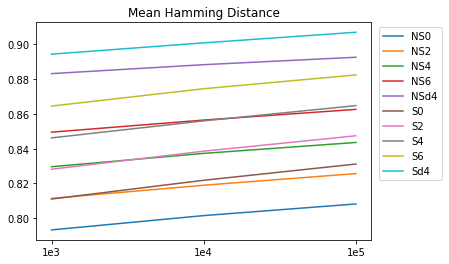

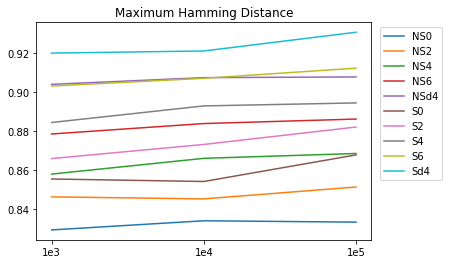

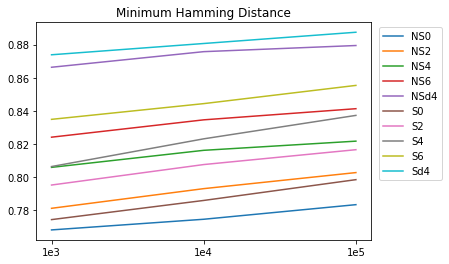

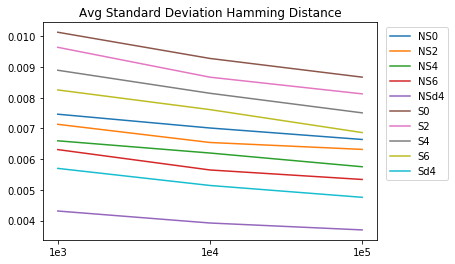

In [8]:
def hamming_plot(data, categories, hamming_type):
    fig, ax = plt.subplots()
    for i in range(10):
        ax.plot(sizes, data[i])
    legend = ax.legend(categories, bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
    ax.set_title("{} Hamming Distance".format(hamming_type))
    plt.savefig(os.path.join(output_path, "{}_hamming_plot.jpg".format(hamming_type)),
               bbox_extra_artists=(legend,),
               bbox_inches='tight'
               )


hamming_plot(results["mean"], categories, "Mean")
hamming_plot(results["max"], categories, "Maximum")
hamming_plot(results["min"], categories, "Minimum")
hamming_plot(results["std"], categories, "Avg Standard Deviation")